# Кластеризація. 

Кластерний аналіз, або кластеризація - це завдання групування набору об'єктів таким чином, щоб об'єкти у одній групі (кластері) були більш схожими між собою, ніж інші у інших групах. Це основне завдання пошукового аналізу даних та загальна техніка у статистичному аналізі даних, який використовується у багатьох галузях, включачи розпізнавання образів, аналіз зображень, отримання інформації, стискання даних, комп'ютерна графіка та машинне навчання.

Сам по собі кластерний аналіз - це не один конкретний алгоритм, а загальне завдання, яке необхідно вирішити. Це може бути досягнуто різними алгоритмами, які суттєво відрізняються у своєму розумінні того, що являє собою кластер, і як їх ефективно знайти. Популярні поняття кластерів включають групи з малими відстанями між елементами кластерів, щільні області простору даних, інтервали або певні статистичні розподіли. Тому кластеризацію можна сформулювати як багатоцільову задачу оптимізації. Відповідний алгоритм кластеризації та налаштування параметрів залежать від індивідуального набору даних і передбачуваного використання результатів. Кластерний аналіз як такий не є автоматичним завданням, а повторюваним процесом виявлення знань або інтерактивної багатоцільової оптимізації, яка передбачає спроби та невдачі. Часто необхідно змінювати попередню обробку даних і параметри моделі, поки результат не досягне бажаних властивостей.

## Метод k-means (k-середніх)
Цей метод є алгоритомом навчання без вчителя який намагається об'єднати дані на основі їх схожості. Навчання без вчителя означає, що даних, які необхідно передбачити нема і алгоритм намагається виявити шаблони у даних.

Алгоритм працює наступним чином:
1. Вказується кількість майбутніх кластерів;
1. Для кожного кластеру випадковим чином вибирається центр;
1. Всі точки призначаються до найближчого центроїду;
1. Обраховується центр маси для кожного кластеру. Це можна зробити наступним чином: для осі `х` рахується середнє значення координати `x` для усіх точок кластеру. Це буде координата нового центроїду по осі `x`. Аналогічно рахується координата по осі `y`. Отримана точка і буде новим центроїдом кластеру;
1. Точки перепризначаються до нових центроїдів;
1. Кроки 3-5 повторюються доти, доки повторення цих кроків не має ніякого ефекту.

Цей метод працює як у двовимірному, так і у багатовимірному просторах.

### Реалізація.
#### Імпорт бібліотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Імпорт даних.

In [2]:
iris = pd.read_csv('iris.csv') 
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Візуалізація даних.

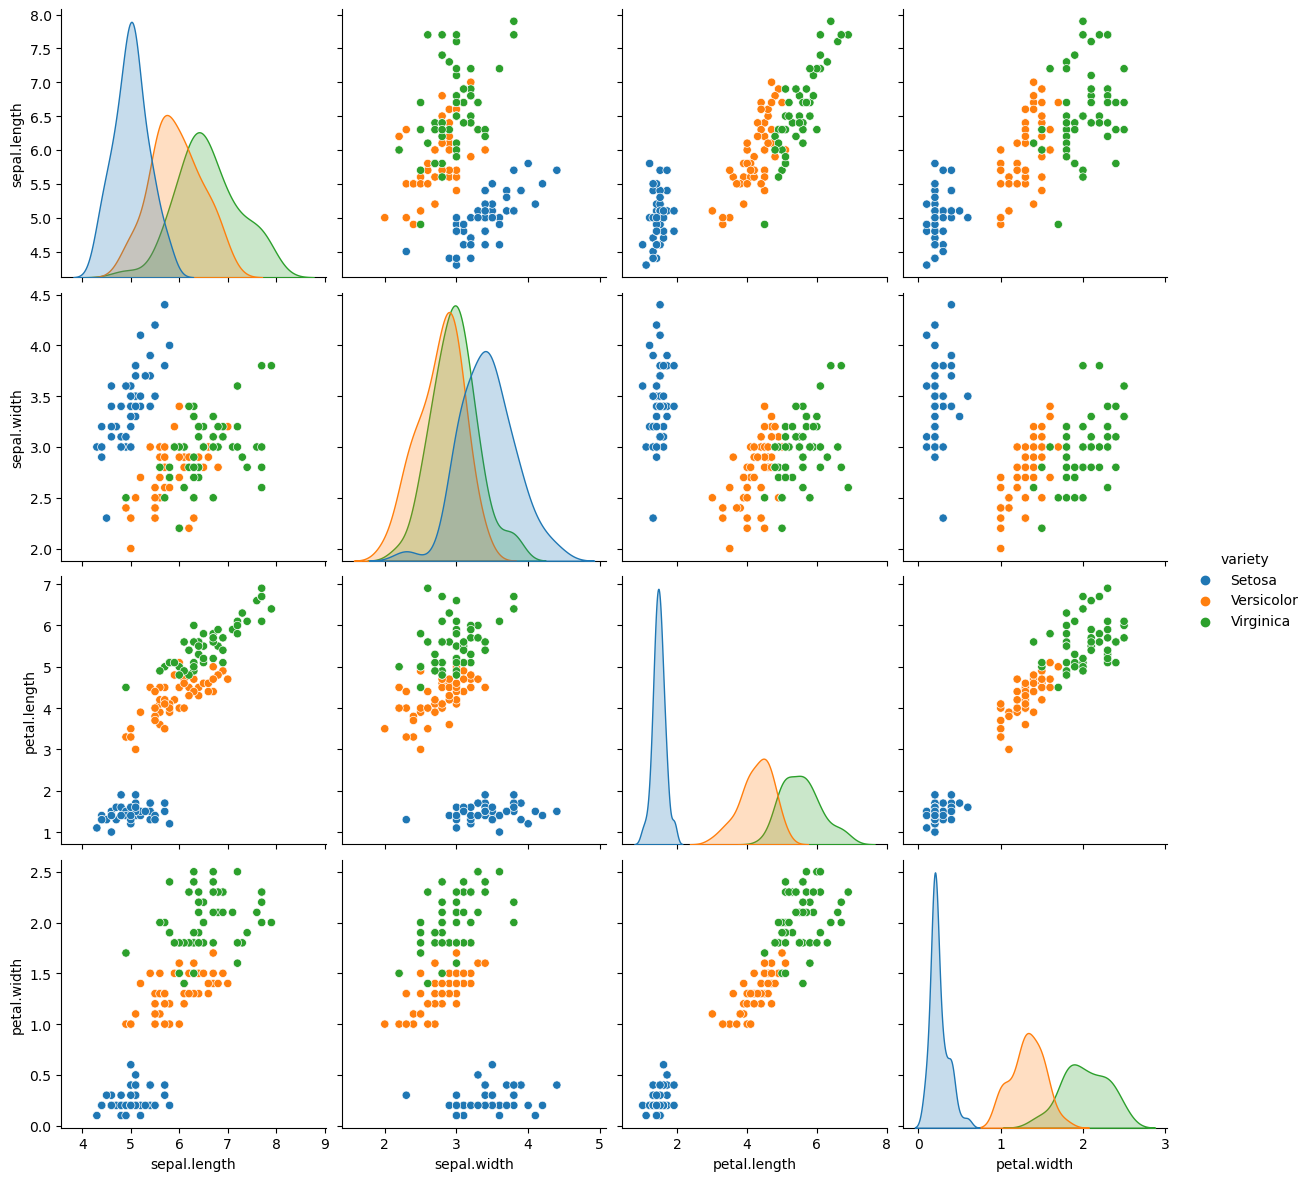

In [3]:
sns.pairplot(iris, hue = "variety", height = 3)

#### Кластеризація.

In [4]:
from sklearn.cluster import KMeans

Створюємо об'єкт класу [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) і у параметрах задається кількість майбутніх кластерів.

In [5]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris.drop(['variety'], axis = 1).values)

/Users/mykola/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [6]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [8]:
iris_labels = iris['variety'].map({'Setosa' : 0, 'Versicolor': 1 ,'Virginica': 2})

#### Результати.

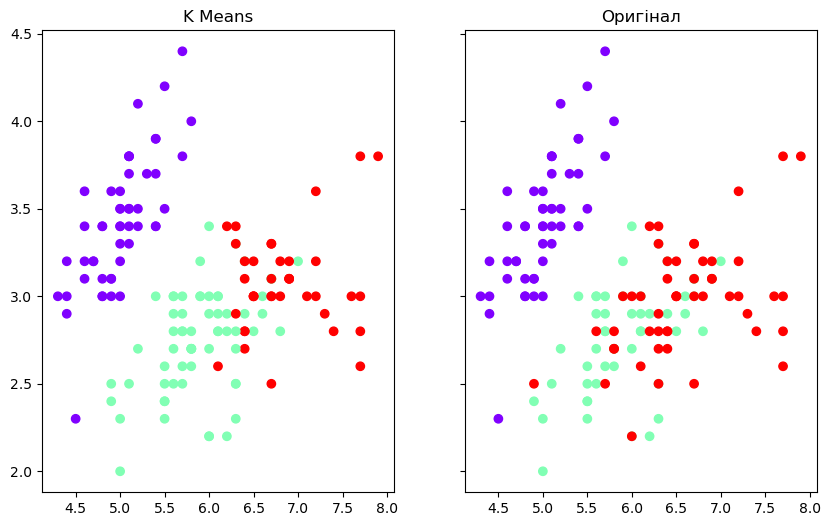

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10, 6))
ax1.set_title('K Means')
ax1.scatter(iris['sepal.length'], iris['sepal.width'], c = kmeans.labels_, cmap='rainbow')
ax2.set_title("Оригінал")
ax2.scatter(iris['sepal.length'], iris['sepal.width'], c = iris_labels.values, cmap='rainbow')

Кольори на двох графіках для однакових кластерів не співрадають.

#### Метод ліктя.
Як вказано у кроці 1 алгоритму, необхідно задати бажана число майбутніх кластерів. Існують різні методи визначення кількості кластерів і одним з них є метод ліктя.
У методі лікта обраховується сума квадратів відстаней між усіма точками у кластері та його центроїді. Англійською параметр який обраховується називається Within Cluster Sum of Squares або WCSS.
Але для метода ліктя наперед необхідно мати сформовані кластери. Тому спочатку запускається кластеризація для різної початкової кількості кластерів, а потім з отриманих результатів за методом ліктя обирається оптимальний результат. 
Метод ліктя є графічним методом. На графіку шукається згин. Можливі випадки, коли згин може бути не очевидним, або їх може бути декілька. Тоді рішення про оптимальну кількість кластерів приймає лишається за розробником.

/Users/mykola/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mykola/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mykola/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mykola/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

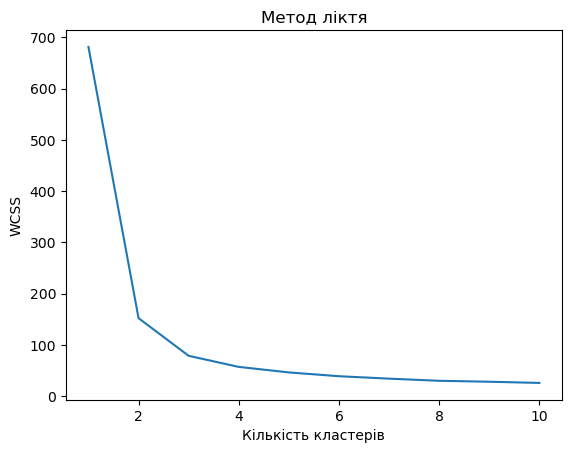

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris.drop(['variety'], axis = 1).values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

Як видно з  графіку оптимальним числом для даного датасету може бути 2 або 3.

# Агломеративна кластеризація. 
Агломеративна кластеризація - це підтип ієрархічної кластеризації. Різниця між ієрархічною кластеризацією та кластеризацією K-середніми полягає у методі побудови кластерів.
У агломеративній кластеризації процес побудови починається від найменших кластерів до одного великого, коли у дивізивній кластеризації процес йде навпаки, з одного великого кластера до багатьох малих.

Нехай є N точок даних.
Алгоритм агломеративної ієрархічної кластеризації:
1. Кожна точка даних робиться кластером з однією точкою. Це формує N кластерів;
1. Беруться дві найближчих точки жаних і з них формується новий кластер. Це формує N - 1 кластери;
1. Беруться два найближчиш кластери і з них формується новий класетр. Це формує N - 2 кластери;
1. Крок 3 повторюється до того моменту, поки не залишиться один кластер. На цьому алгоритм завершує свою роботу.

У цьому алгоритмі важливим є вимірювання відстані між кластерам, оскільки це впливає на роботу алгоритму. Для цього можуть бути використані наступні методи:
1. Обрахувати евклідову відстань між двома точками з різних кластерів;
1. Взяти дві точки з різних кластерів, відстань між якими є найбільша;
1. Знайти центроїди кластерів і обрахувати відстані між ними.

#### Кластеризація. [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'ward')
result = hc.fit(iris.drop(['variety'], axis = 1).values)

/Users/mykola/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#### Візуалізація результатів.

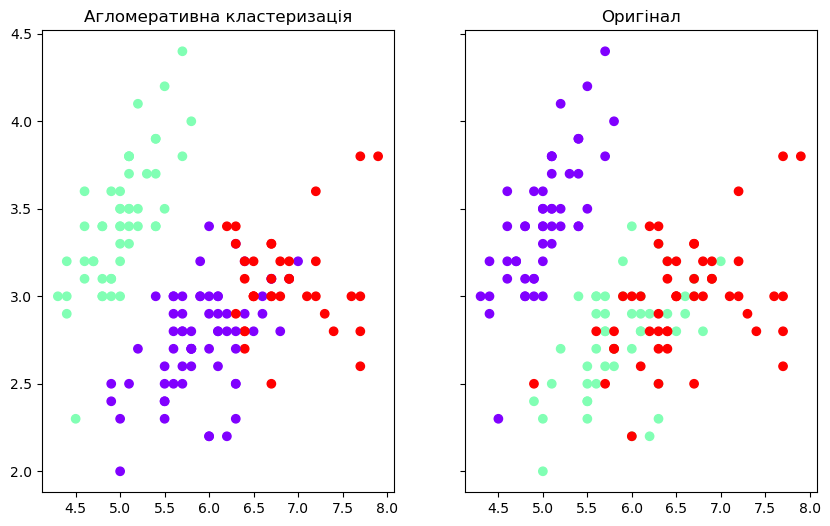

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 6))
ax1.set_title('Агломеративна кластеризація')
ax1.scatter(iris['sepal.length'], iris['sepal.width'], c = result.labels_, cmap = 'rainbow')
ax2.set_title("Оригінал")
ax2.scatter(iris['sepal.length'], iris['sepal.width'], c = iris_labels.values, cmap = 'rainbow')

#### Дендрограми.

Ієрарахічні кластеризації запам'ятовують кожний крок процесу роботи. Ця пам'ять зберігається у дендрограмах.
Дендрограми будуються наступним чином: Коли два найближчі кластери об'єднуються у один на дердрограмі будується пряма між кластерами, які з'єднались. Ця лінія будується на висоті, яка відповідає евклідовій відстані між двома точками/кластерами. Тобто, чим дальше кластери знаходяться між собою, тим більша між ними різниця, і настільки високо буде розташована пряма у дендрограмі. 
З дендрограми можна дізнатись яким чином створювались кластери.

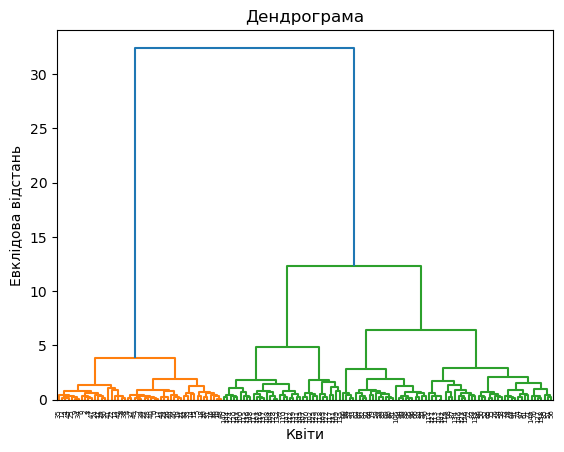

In [13]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(iris.drop(['variety'], axis = 1).values, method = 'ward'))
plt.title('Дендрограма')
plt.xlabel('Квіти')
plt.ylabel('Евклідова відстань')
plt.show()

Побудовану дендрограму можна використати для визначення оптимальної кількості майбутніх кластерів. Це робиться через задання певної межі відстані, на якій кластери мають знаходитьсь один від одного. Ця межа на дендрограмі позначається горизонтальною прямою. Наприклад, якщо для дендрограми зверху задати межу на рівні 15 по осі `y`, то вона перетне дві лінії дендрограми. Це означає, що опитимальне число кластерів для агломеративнної кластеризацій для такої межі є 2. Якщо ж задати межу на рівні 10, то кількість оптимальних кластерів вже буде 3.

# [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
Ця кластеризація відноситься до класетризацій, які базуються на щільності. Алгоритми, які розглядались раніше добре працюють, коли кластери мають форми нормального вигляду. Коли ж кластери можуть мати довільну форму, або можуть мати багато елементів, які лежать далеко від кластеру, то алгоритми, які базуються на щільності є більш ефективними.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise - просторова кластеризація додатків із шумом на основі щільності. Цей алгоритм здатний знаходити кластери довільних форм з шумами. Головна ідея алгоритму - точка належить до кластеру, якщо вона близька до багатьох точок з цього кластеру.

Є два ключових параметри, від яких залежить робота алгоритму DBSCAN:
1. eps - відстань, яка вказує на сусідство. Дві точки вважаються сусідами, якщо відстань між ними є менша або рівна до параметра eps;
1. minPts - мінімальна кількість точок, яка є кластером.

На основі цих двох параметрів, точки класифікуються як точка ядра, точка на кордоні та точка яка лежить за межами:
1. Основна точка - точка є основною, якщо у радіусі `eps` від неї є `minPts` або більше точок (разом з нею);
1. Точка є точкою на кордоні, якщо вона є у досяжності до основної точки, і разом з тим навколо неї є менше точок, ніж `minPts`;
1. Точка за межами - це точка, яка не є основною точкою і не є в досяжності з будь якої основної точки.

Алгоритм DBSCAN:
1. Визначаються значення `eps` та `minPts`;
1. Початкова точка визначається випадковим чином. Розглядається її оточення у радіусі `eps`. Якщо у її оточенні є щонайменше `minPts` точок, то точка позначається як основна точка і починається формування кластера. У іншому випадку вона позначається як шум. Як тільки починається формування кластера, всі точки у сусідстві з основною точкою позначаються як елементи кластеру. Якщо серед точок, які додаються до кластеру є основні точки, то всі точки, які були у сусідстві з ними автоматично стають елементами кластеру, що формується.
1. Крок 2 повторюється до того моменту, поки не будуть відвідані всі точки.

Перевагами цього алгоритму є те, ще він не передбачає визначення кількості кластерів наперед, вміє працювати з формами довільних форм та він вміє визначати точки, які лежать за межами кластерів.

З недоліків є те, що у деяких випадках визначити правильну відстань до сусідів `eps` є непросто і це потребує знань з області дослідження. Також, якщо кластери сильно відрізняються у щільності, DBSCAN не є найкращим методом, щоб визначати кластери.

#### Кластеризація.

In [14]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.7, min_samples = 20)
db.fit(iris.drop(['variety'], axis = 1).values)

DBSCAN(eps=0.7, min_samples=20)

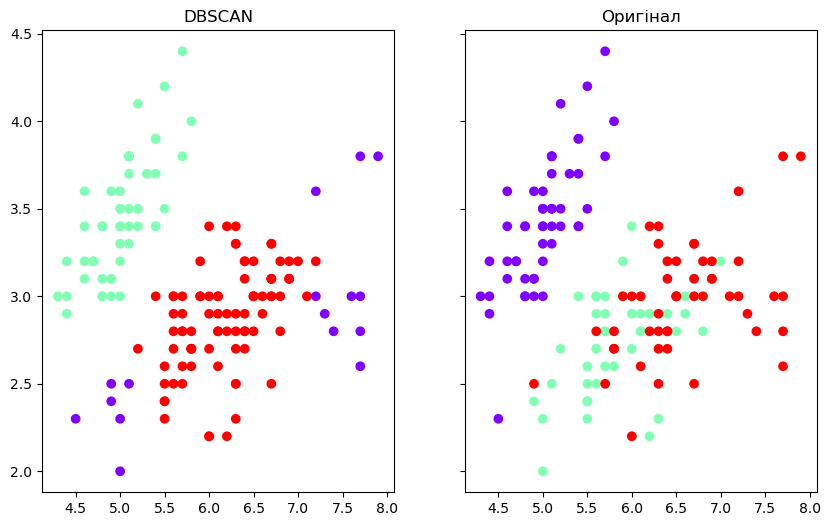

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10, 6))
ax1.set_title('DBSCAN')
ax1.scatter(iris['sepal.length'], iris['sepal.width'],c = db.labels_, cmap = 'rainbow')
ax2.set_title("Оригінал")
ax2.scatter(iris['sepal.length'], iris['sepal.width'],c = iris_labels.values, cmap = 'rainbow')